In [16]:
Pkg.add("PyPlot")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


# Derivación numérica

__Ejercicio 1__. Escribe una función `derivadaNumerica` que
reciba: una función $f\colon \mathbb{R}\mapsto\mathbb{R}$,
un punto $x_0\in\mathbb{R}$ y un número $h\in\mathbb{R}$. Esta función deberá calcular una aproximación a la
derivada utilizando la definición indicada arriba ignorando
la parte del límite. Es decir, algo como: `derivada_numerica(f,x,h)`.

__solución:__en esta parte crearemos una función llamada dn, la cual usara la fórmula:
$$f'(x)\approx \frac{f(x+h)-f(x)}{h}$$
además como en el ejrcicio 2 se pide graficar para bastantes puntos, crearemos esta función de manera que $x$ se un número, pero $h$ sea un conjunto de valores

In [40]:
doc"""
esta función calcula el valor aproximado de f'(x) usando la aproximación $f'(a)\approx \frac{f(a+h)-f(x)}{h}$ , por favor introduza (f,a,h), h puede ser un conjunto de valores (vector), por ejemplo, para f(x)=x si ponemos a=0 h=3 se tiene 3
"""
function dn(f,a,h0)
    L=length(h0)#como pensamos en un arreglo primero vemos cuantos elementos tiene
    D=[] #creamos un vector vacío para ir guardando los resultados
    for i in 1:L #para cada elemento en h vamos a aplicar d(h) es decir aproximamos la derivada en cada valor de h
        k=(f(a+h0[i])-f(a))/h0[i]#usamos la formula en x=a
        push!(D,k)#aplicamos a cada elemento y lo guardamos en D
        end
        return D #pedimos que nos devuelva los resultados
    end

dn

In [41]:
f(x)=x*x #usaremos esta función para probar el método

f (generic function with 1 method)

In [42]:
dn(f,0,1)#ya sabemos que f'(0)=0 para ello comprabamos que con h=1 aún no se parece

1-element Array{Any,1}:
 1.0

In [43]:
dn(f,0,0.0000001)#pero poco a poco se va pareciendo

1-element Array{Any,1}:
 1.0e-7

__Ejercicio 2__. Utiliza tu función `derivadaNumerica` para
calcular la derivada de la función $\cos$ en un punto
$x_0\in[0,1)$. Compara tu resultado con el que indica el
cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$.
Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$:
$$\epsilon=\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)},$$
respecto a $h$.

In [2]:
b=0.00000001:0.00000001:0.0001#creamos una arreglo que tome valores pequeños para usarlos como h

1.0e-8:1.0e-8:0.0001

In [3]:
f(x)=cos(x)#ahora definimos la función que queremos analizar

f (generic function with 1 method)

In [74]:
dn(f,0,b) #aplicamos la derivada numérica en 0 donde ya sabemos que vale 0

10000-element Array{Any,1}:
  0.0       
 -1.11022e-8
 -1.4803e-8 
 -1.94289e-8
 -2.44249e-8
 -2.96059e-8
 -3.48927e-8
 -4.02456e-8
 -4.44089e-8
 -4.996e-8  
 -5.45019e-8
 -6.01371e-8
 -6.49053e-8
  ⋮         
 -4.9945e-5 
 -4.995e-5  
 -4.9955e-5 
 -4.996e-5  
 -4.9965e-5 
 -4.997e-5  
 -4.9975e-5 
 -4.998e-5  
 -4.9985e-5 
 -4.999e-5  
 -4.9995e-5 
 -5.0e-5    

In [4]:
a=1/b#creamos un arreglo que sea 1/h

10000-element Array{Float64,1}:
     1.0e8    
     5.0e7    
     3.33333e7
     2.5e7    
     2.0e7    
     1.66667e7
     1.42857e7
     1.25e7   
     1.11111e7
     1.0e7    
     9.09091e6
     8.33333e6
     7.69231e6
     ⋮        
 10011.0      
 10010.0      
 10009.0      
 10008.0      
 10007.0      
 10006.0      
 10005.0      
 10004.0      
 10003.0      
 10002.0      
 10001.0      
 10000.0      

In [1]:
using SymPy#debido a que derivaremos ahora una función para obtener el error "epsilon"

In [77]:
doc"""
esta función calcula el error relativo de la derivada numérica con el valor exacto, donde el error relativo es $\epsilon=\frac{\Delta f(a,h)/h-f'(a)}{f'(a)},$, introduzca (f,a,h0) donde h0 puede ser un arreglo de valores
"""
function error(f,a,h0)
    l=length(h0)#usamos la longitud del arreglo
    e=[]#una lista donde se guardaran los valores
     x = Sym("x")#variable
    h = f(x)#convertimos a simbolos
    n(h)=(h(a+h)-h(a))/h#tomamos un vector que nos da la derivada numérica en a
    dh = diff(h(x))#derivamos
    df = lambdify(dh,[x]) #ahora la convertimos de nuevo en función de Julia para poder aplicar la derivada
    for i in 1:l#usaremos este for para calcular el error para cada elemento de h0
        ep=(n(h[i])-df(a))/df(a) #Formula del error epsilon
        push!(e,ep) #Guardamos el valor del error en el arreglo
    end
    return e#devolvemos la lista de error
end

error

In [5]:
function errorepsilon(f,x0,h0)
    #Defino la variable longitud que me da la cantidad de elementos del arreglo h0
    longitud=length(h0)
    #Doy la función d(h) la cuál es la misma usada en la funcion derivadaNumerica
    d(h)=(g(x0+h)-g(x0))/h
    ### Aqui es donde aplico SymPy pues este programa debe funcionar para cualquier f que yo quiera, calculo la derivada de la función introducida
    ### Variable simbólica x
    x = Sym("x")
    ### Función con variable x
    g = f(x)
    ### Aplico la diferenciación a g(x)
    dg = diff(g(x))
    ### La vuelvo una función de Julia
    df = lambdify(dg,[x]) 
    ###Dejo de usar SymPy
    #Aquí está el arreglo donde guardaré los valores del error
    listaerror=[]
    for i in 1:longitud #Ciclo for que calculará el valor epsilon a cada valor de la lista introducida
        epsilon=(d(h0[i])-df(x0))/df(x0) #Formula del error epsilon
        push!(listaerror,epsilon) #Guardo el valor de dicha epsilon en mi arreglo
    #Fin de iteración
    end
    #Como resultado arrojo la listaerror
    return listaerror
#Fin
end

errorepsilon (generic function with 1 method)

In [6]:
errorepsilon(f,0,b)

  likely near In[6]:1
  likely near In[6]:1
  likely near In[6]:1
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl


10000-element Array{Any,1}:
  nan
 -inf
 -inf
 -inf
 -inf
 -inf
 -inf
 -inf
 -inf
 -inf
 -inf
 -inf
 -inf
    ⋮
 -inf
 -inf
 -inf
 -inf
 -inf
 -inf
 -inf
 -inf
 -inf
 -inf
 -inf
 -inf

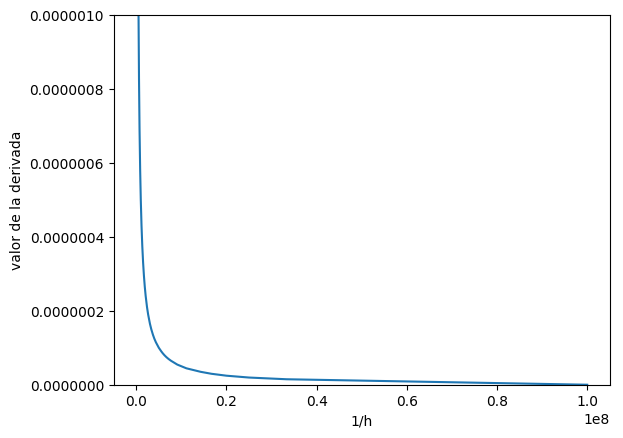

(0, 1.0e-6)

In [71]:
xlabel("1/h")
ylabel("valor de la derivada")
plot(a,abs.(dn(f,0,b)))
ylim(0,0.000001)


como podemos ver cada $h$ se hace mas pequeña ($\frac{1}{h}$ se hace mas cercano a $1$) entonces tenemos que la derivada se hacerca mucho al valor real, con el detalle de cada vez lo hace mas suavemente

__Ejercicio 3__. Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe
alguna forma de mejorar el cálculo de la derivada numérica? Comenta.

__Tip:__ ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series? 

__Nota:__ Entregar en $\LaTeX$ en el notebook de la tarea.

__solución:__ahora analicemos para f sus dos series de taylor en $h$ y $-h$:
$$f(x+h)=\sum_{k=0}^{\infty} \frac{f^{(k)}(x)\cdot (h)^k}{k!}$$
$$f(x-h)=\sum_{k=0}^{\infty} \frac{f^{(k)}(x)\cdot (-h)^k}{k!}$$
entonces es claro que si restamos las dos series obtenemos:
$$f(x+h)-f(x-h)=\sum_{k=0}^{\infty} \frac{f^{(k)(x)}}{k!}\cdot (h^k-(-h)^k)=\sum_{k=0}^{\infty} \frac{f^{(k)}(x)}{k!}\cdot (h^k+(-1)^{k+1}\cdot h^k)=\sum_{k=0}^{\infty} \frac{2f^{(2k+1)}(x)\cdot h^{2k+1}}{(2k+1)!}$$
ahora solo consideramos el primer termino, es decir usamos:
$$\sum_{k=0}^{\infty} \frac{2f^{(2k+1)}(x)\cdot h^{2k+1}}{(2k+1)!} \approx 2f'(x)h\ \therefore\ f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}$$

__Pregunta:__ ¿Hay una forma de construir una derivada numérica aún mas exacta sin tener que hacer $h$ arbitrariamente pequeño?, ¿que opinas?

__Respuesta:__no, en mi opinión para la derivada se tomo un límite cuando h se hace pequeño, por tanto entre mas pequeño, mas se parece y si podemos hacer que al disminuir algún otro parámetro se acerque al valor real, es por que este parámetro al hacerse pequeño implica que h también lo haga.

__Ejercicio 4__. Implementa la _derivada
simétrica_ en `Julia` como `derivada_Simetrica` y repite la
comparativa que realizaste en el __ejercicio 2__.

In [1]:
doc"""
esta función calcula la derivada en un punto $x$ con la expresión: $f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}$
por favor introduzca (f,x,h) donde h puede ser un arreglo
"""
function Dersim(f,a,h0)
    L=length(h0)#como pensamos en un arreglo primero vemos cuantos elementos tiene
    D=[] #creamos un vector vacío para ir guardando los resultados
    for i in 1:L #para cada elemento en h vamos a aplicar d(h) es decir aproximamos la derivada en cada valor de h
        d(h)=(f(a+h)-f(a-h))/h#usamos la fórmula de la derivada simétrica
        push!(D,d(h0[i]))#aplicamos a cada elemento y lo guardamos en D
        end
        return D #pedimos que nos devuelva los resultados
    end

Dersim

In [2]:
x=0.000000001:0.000000001:0.0001#de nuevo proponemos nuestros valores de h pequeños

1.0e-9:1.0e-9:0.0001

In [3]:
y=1/x#y nuestro 1/h

100000-element Array{Float64,1}:
     1.0e9    
     5.0e8    
     3.33333e8
     2.5e8    
     2.0e8    
     1.66667e8
     1.42857e8
     1.25e8   
     1.11111e8
     1.0e8    
     9.09091e7
     8.33333e7
     7.69231e7
     ⋮        
 10001.1      
 10001.0      
 10000.9      
 10000.8      
 10000.7      
 10000.6      
 10000.5      
 10000.4      
 10000.3      
 10000.2      
 10000.1      
 10000.0      

In [4]:
f(x)=cos(x)#usaremos esta función como pide el ejercicio 2

f (generic function with 1 method)

In [5]:
z=Dersim(f,0,x)

100000-element Array{Any,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [8]:
using PyPlot

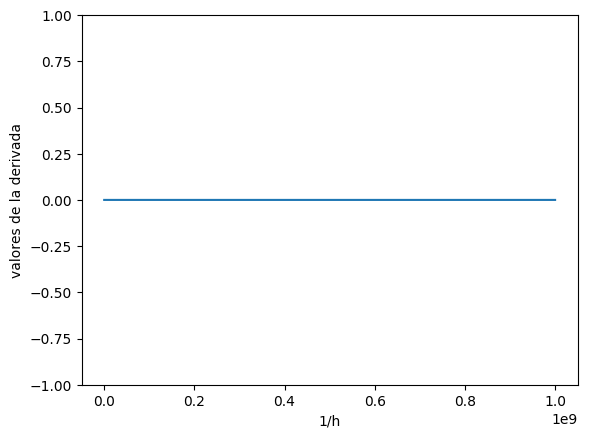

(-1, 1)

In [10]:
xlabel("1/h")
ylabel("valores de la derivada")
plot(y,Dersim(f,0,x))
ylim(-1,1)

en este caso notamos que sin ningún problema el valor  de la derivada es exacto desde el principio pues coseno es simétrico respecto al eje $Y$, por lo cual no hay error en este caso

Analizando la serie de la diferencia finita hacia adelante podemos factorizar la función útilizando la propiedad de linealidad del operador derivada, antes pasando del lado izquierdo de la serie a $f(x)$:

\begin{eqnarray}
f(x+h)-f(x)&=& \left[h \left. \frac{d}{d \xi}  \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}   \right|_{\substack{ \xi_{1}=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}   \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)\right]f{\left (x \right )}\\
&=&\left[ \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right]f(x)
\end{eqnarray}
Luego podemos definir el operador $\Delta_h$, el cual se define como:
$$\Delta_h:f \mapsto f(x+h)-f(x)=\Delta f(x,h).$$
__Ejercicio 5:__ Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

__Demostración:__en efecto, tomemos el operador$\Delta_h$ ahora por lo anterior, se tiene que:
$$\Delta_h(f(x)+ag(x))=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n(f(x)+ag(x))}{d\xi^n}\right|_{\substack{ \xi=x }}$$ por lo cual sabemos ya que $\forall n\in \mathbb{N}$ se cumple que:
$$\left.\frac{d^n(f(x)+ag(x))}{d\xi^n}\right|_{\substack{ \xi=x }}=\left.\frac{d^nf(x)}{d\xi^n}\right|_{\substack{ \xi=x }}+a\left.\frac{d^ng(x)}{d\xi^n}\right|_{\substack{ \xi=x }}$$
por tanto obtenemos:
$$\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n(f(x)+ag(x))}{d\xi^n}\right|_{\substack{ \xi=x }}=\sum_{n=1}^{\infty}\left(\frac{1}{n!}h^n\left.\frac{d^nf(x)}{d\xi^n}\right|_{\substack{ \xi=x }}+a\frac{1}{n!}h^n\left.\frac{d^ng(x)}{d\xi^n}\right|_{\substack{ \xi=x }}\right)=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^nf(x)}{d\xi^n}\right|_{\substack{ \xi=x }}+a\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^ng(x)}{d\xi^n}\right|_{\substack{ \xi=x }}=\Delta_hf(x)+a\Delta_hg(x)$$
por esta última expresión y como se tomo $f,g$ derivables en $\xi$ pero arbitarias, además $a$ se tomo también arbitrario, por tanto concluimos que el operador $\Delta_h$ es lineal $\blacksquare$

__Ejercicio 6:__ Para saber como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia adelante_ es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.
    
* __Nota:__ En la clase se demostró que $\phi(x)=e^x-1$, escriba el razonamiento en $\LaTeX$ de como se llegó a esto.

__Solución:__ analicemos en primer lugar la función exponencial, para ello recordemos que usando taylor y analiticidad de la exponencial en el punto $x=0$ se obtiene que:
$$e^x=\sum_{k=0}^{\infty} \frac{x^n}{n!}$$
ahora bien, si pasamos el primer termino que es $1$ obtenemos:
$$e^x-1=\sum_{k=1}^{\infty} \frac{x^n}{n!}$$
ahora comparamos con la serie que caracteiza a $\Delta_h$:
$$h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}=\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)^n\sim x^n$$
por tanto si sustituyeramos esta ultima expresión como una x y usando la serie de taylor de la exponencial se tiene que:
$$\Delta_h=\sum_{k=1}^{\infty} \frac{x^n}{n!}=e^{x}-1$$
así que finalmente:
$$\Delta_h=e^{h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}}-1$$
y así finalmente obtuvimos lo que buscabamos, es decir:
$$\phi(x)=e^x-1;\ donde\ x=h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}$$

__Ejercicio 7:__ Explotar la relación $\delta_h=\Delta_h-\Delta_{-h}$, donde $\delta_h:f(x)\mapsto f(x+h)-f(x-h)$, para encontrar cual es la función $\theta$ que relaciona a $\delta_h$ con el operador derivada exacta, es decir:
$$\delta_h=\theta\left(h\left. \frac{d}{d\xi}\right|_{\xi=x}\right).$$

Una vez que la encuentren, despejen $\left. \frac{d}{d\xi}\right|_{\xi=x}$ y calculen la serie de Taylor de mánera similar a lo mostrado en las ecuaciones 3 y 4.

__solución:__
recordando lo que obtuvimos en el ejercicio 3:
ahora analicemos para f sus dos series de taylor en $h$ y $-h$:
$$f(x+h)=\sum_{k=0}^{\infty} \frac{f^{(k)}(x)\cdot (h)^k}{k!}$$
$$f(x-h)=\sum_{k=0}^{\infty} \frac{f^{(k)}(x)\cdot (-h)^k}{k!}$$
entonces es claro que si restamos las dos series obtenemos:
$$\delta_h=f(x+h)-f(x-h)=f(x+h)-f(x)+f(x)-f(x-h)=\Delta_h-\Delta_{-h}$$
por el ejercicio anterior tenemos que:
$$\Delta_h =e^{h\frac{d}{d\xi}|_{\xi=x}}-1$$
$$\Delta_{-h} =e^{-h\frac{d}{d\xi}|_{\xi=x}}-1$$
por tanto:
$$\delta_h=e^{h\frac{d}{d\xi}|_{\xi=x}}-e^{-h\frac{d}{d\xi}|_{\xi=x}}=2senh(-h\frac{d}{d\xi}|_{\xi=x})$$
así finalmente despejando obtenemos que:
$$\theta\left(h\left. \frac{d}{d\xi}\right|_{\xi=x}\right)=senh(\left(h\left. \frac{d}{d\xi}\right|_{\xi=x}\right)$$
$$\frac{d}{d\xi}|_{\xi=x}=\frac{senh^{-1}(\frac{\delta_h}{2})}{h}$$
